
Rekurencyjne Sieci Neuronowe (RNN) są specjalnym rodzajem sieci neuronowych, które są zaprojektowane do przetwarzania sekwencyjnych danych.
Ich główną cechą jest to, że mają wewnętrzny stan (pamięć), który pozwala im przechowywać informacje o wcześniejszych stanach komórek warst ukrytych.


# 2. Różnice między RNN a sieciami feed-forward

Feed Forward Network:
- Dane przepływają w jednym kierunku (od wejścia do wyjścia).
- Brak pamięci o poprzednich stanach komórek warstwy ukrytej.
- Nadaje się do klasyfikacji i regresji na danych niezależnych (kolejność użycia danych w modelu nie ma znaczenia).

RNN:
- Mają połączenia rekurencyjne, umożliwiające przechowywanie informacji o wcześniejszych wartościach komórek ukrytych.
- Przydatne w analizie danych sekwencyjnych, takich jak szeregi czasowe, tekst czy dźwięk.

Przykładowa architektura sieci RNN

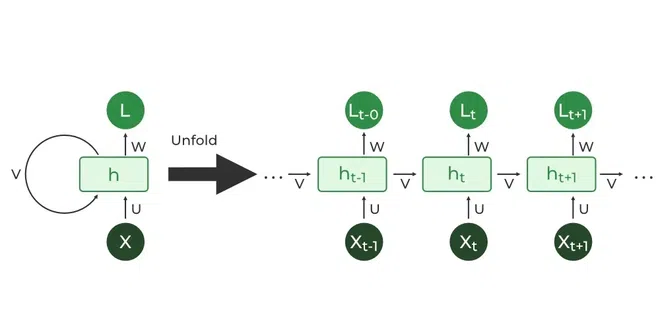

(źródło: https://www.geeksforgeeks.org/introduction-to-recurrent-neural-network/)



**QQ** Jak działa droput w RNN?

### Przykład regresji z użyciem RNN

Przewidywanie miesięcznej ilości pasażerów.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Ładowanie danych
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv", parse_dates=["Month"], index_col="Month")
data = data.dropna()
data.head(10)

In [ ]:
# Konwersja do numpy
data = data.values

**QQ** Czy potrzebne jest wykonanie skalowania (MinMaxScaling) danych targeetu do wartości 0-1? Jakie mogą być konsekwencje takiego skalowania?

In [ ]:
# Fuckcja tworząca sekwencje danych wejściowych i wyjściowych
def create_sequences(data, seq_length=5):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [ ]:
# Przygotowanie zbioru danych do sieci
seq_length = 5
X, y = create_sequences(data, seq_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
X[:2]

In [ ]:
y[:10]

In [ ]:
# Definicja Sieci FNN
fnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(seq_length, 1)),
    Dense(32, activation='relu'),
    Dense(1)
])
fnn_model.compile(optimizer='adam', loss='mse')

In [ ]:
# Przykładowy trening modelu FNN, może być usprawniony
fnn_model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))

In [ ]:
# Defninicja Sieci RNN
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=False, input_shape=(seq_length, 1)),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')

In [ ]:
# Przykładowy trening modelu RNN, może być usprawniony
rnn_model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))

In [ ]:
#  Predykcje
y_pred_fnn = fnn_model.predict(X_test)
y_pred_rnn = rnn_model.predict(X_test)

In [ ]:
# Transformacja danych z Sieci FNN, by odpowiadały kształem danym testowym

y_pred_fnn_reshaped  = y_pred_fnn[0].tolist()

for i, y_i in enumerate(y_pred_fnn[1:]):
    y_pred_fnn_reshaped.append(y_i[-1])

y_pred_fnn_reshaped = np.array(y_pred_fnn_reshaped)

In [ ]:

# Wizualizacja wyników
plt.figure(figsize=(12, 5))
plt.plot(y_test, label='Actual', color='black')
plt.plot(y_pred_fnn_reshaped, label='FNN Prediction', linestyle='dashed')
plt.plot(y_pred_rnn, label='RNN Prediction', linestyle='dashed')
plt.legend()
plt.title("Time Series Prediction using FNN and RNN")
plt.show()


**TASK 1**
- a) Wyznaczyć i porównać wartości MSE i MAE (mean absolute error) dla danych testowych ze zbioru danych AirPassengers dla RNN i FNN.
- b) Wykonać predykcję dla 5 nieznanych punktów po danych testowych (5 kolejnych dni) i wyrysować na wykresie razem z pozostałymi danymi. (Predykcja powinna być wykonana 5 razy, przy czym przewidziana wartość ilości pasażerów w pierwszej predykcji powinna być ostatnią wartością wektora danych wejściowych dla drugiej predykcji, itd.)
- c) W powyższym przykładzie wytrenowaliśmy model RNN typu **many-to-one**, w którym dla kilku sekwencyjnych punktów wejściowych zwracana jest jedna wartość wyjściowa. Innym typem sieci RNN są modele **many-to-many** gdzie kilka punktów wejściowych przetwarzane jest w kilka wartości wyjściowych. Poniżej zbudować i wytrenować  model RNN many-to-many, który:
  - przyjmuje 5 wartości wejściowych (seq_length=5)
  - przetwarza dane z pomocą prostej warsty RNN
  - jako wyjście zwraca 3 wartości (output_length=3)
  - porównać metryki (MSE i MAE) i predykcje na danych testowych dla modelu many-to-one i many-to-many. Predykcje powinny być zwizualizowane z odpowiednią legendą. **NOTE** Predykcje mogą być wykonywane z różną strategią uzupełniania kolejnych wejść - co 3 predykcje, co 2 predykcje, co 1 predykcję (patrz punkt b). W tym zadaniu wystarczy wykonać jedną wybraną opcję.

**TIP** Do porównania niezbędne będzie odpowiednie przetwarzanie predykcji modelu, w szczególności zadbanie o zgodność kształtu porównywanych wektorów wyjściowych.

## LSTM
LSTM (Long Short-Term Memory) to specjalna komórka używana w sieciach rekurencyjnych (RNN), zaprojektowana w celu rozwiązania problemu zanikającego gradientu, który występuje w klasycznych komórkach RNN.

Przewagi komórki LSTM vs RNN?

- Pamięć długoterminowa – LSTM przechowuje informacje przez długi czas dzięki mechanizmowi bramkowemu

- Kontrola przepływu informacji – trzy bramki (wejścia, zapominania i wyjścia) pozwalają modelowi decydować, które informacje zachować, a które usunąć

- Lepsze uczenie zależności długoterminowych – w przeciwieństwie do zwykłych RNN, które mają trudności z zapamiętywaniem sekwencji o dużym horyzoncie czasowym


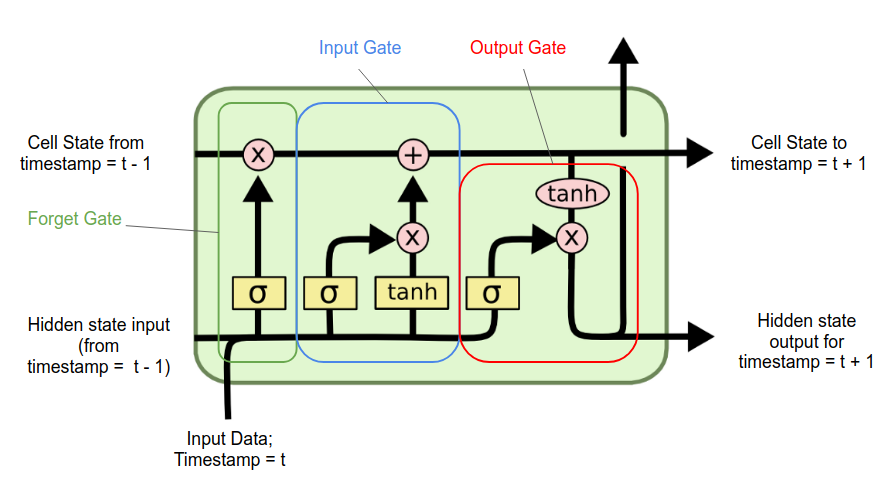

(źródło: https://medium.com/analytics-vidhya/lstms-explained-a-complete-technically-accurate-conceptual-guide-with-keras-2a650327e8f2)

**TASK 2** Wytrenować model predykcji szeregów czasowych dla zbioru AirPassengers z użyciem komórki LSTM (https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM). Porównać model Sieci z LSTM z zwykłą siecią RNN - wykres predykcji dla danych testowych, metryki na zbiorze testowym: MSE, MAE.

**NOTE** Przetwarzanie danych powinny być takie samo jak dla prostej Sieci RNN.

Dane szeregów czasowych mogą być agregowane pod różne wartości długości sekwencji (np. dzień, miesiąc, rok). Taka agregacja może wpłynąć na implementacje i trening modelu Sieci Neuronowych.

**TASK 3**
Wykonać roczną agregację danych dla zbioru danych air passenger.
Dane powinny być uśrednione. Zwizualizować zagregowane dane na wykresie. **TIP** Użyć metod `to_datetime` i `resample` z biblioteki pandas (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html)

Komórka LSTM jest dosyć skomplikowana, w szczególności obliczanie odpowiednich aktywacji oraz gradientów. W związku z tym w ramach zajęć przećwiczymy implementacje klasycznej komórki RNN.

**TASK 4** Implementacja komorki perceptronu z pamiecia:

- inicjalizacja wag `w`
- inicjalizacja biasu `b`
- inicjalizacja wag części pamięciowej, związanej z poprzednią wartością aktywacji komórki (neuronu) `w_m`
- definicja wartości aktywacji komórki (neuronu) dla poprzedniej iteracji (taktu) `a_m`
- zdefiniowanie przykładowego wektora danych wejściowych `x_train` i wyjściowych `y_train`
- obliczenie predykcji: `y_pred = w * x_train + w_m * a_{t-1} + b`
- obliczenie wartości straty: MSE
- ($$) Zadanie dodatkowe. Obliczenie odowiednich gradientów dla takiej komórki:
    - grad_y_pred
    - grad_w
    - grad_w_h
    - grad_b
    - grad_a_h
    
 **NOTE** Obliczanie gradientów dla komórki pamieciąwej jest bardziej złożone niż dla prostego perceptronu. Jest tak ponieważ podczas obliczania gradientu należy uwzględniać wartości komórek w poprzednim takcie oraz ich odpowiednich wag. Wykorzystuje się algorytm BackPropagation Through Time (https://www.geeksforgeeks.org/ml-back-propagation-through-time/). Podobnie jak w zwykłym perceptronie wykorzystuje się również własności pochodnych funkcji złożonych.


**TASK 5**

Modelowanie potwiedzonych przypadków zachorowań na COVID 19 z użyciem RNN.

1. Wytrenować model `SimpleRNN` dla zbioru danych COVID z agregacją dzienną (bez modyfikacji danych):
- wytrenować model many-to-one
- wytrenować model many-to-many
- porównać predykcje i metryki MAE, MSE dla powyższych modeli na danych testowych
- wyrysować predykcje na wykresie dla danych testowych
- wyliczyć predykcje modelu RNN dla 5 nieznanych punktów z przyszłości (okres po danych testowych) i wyrysować je na wykresie
2. Wytrenować model `LSTM` dla zbioru danych COVID z agregacją dzienną (bez modyfikacji danych):
- wytrenować model many-to-one
- wytrenować model many-to-many
- porównać predykcje i metryki MAE, MSE dla powyższych modeli na danych testowych
- wyrysować predykcje na wykresie dla danych testowych
- wyliczyć predykcje modelu LSTM dla 5 nieznanych punktów z przyszłości (okres po danych testowych) i wyrysować je na wykresie
3. Porównać jakość modeli many-to-one dla SimpleRNN i LSTM dla danych testowych zbioru COVID.
4. Wytrenować model many-to-one LSTM dla zbioru danych COVID z agregacją tygodniową (może być uśredniająca lub mediana):
- stworzyć zbiór danych z agregacją tygodniową
- odpowiednio przetworzyć dane wejściowe, w tym wybrać właściwą długość wektora wejściowego (seq_length)
- wytrenować model many-to-one
- wyznaczyć predykcje i metryki MAE, MSE dla danych testowych
- wyrysować predykcje na wykresie dla danych testowych
- wyliczyć predykcje modelu LSTM dla 5 nieznanych punktów z przyszłości (okres po danych testowych) i wyrysować je na wykresie

In [ ]:
# Load dataset
data = pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/main/data/time-series-19-covid-combined.csv")
data['Date'] = pd.to_datetime(data['Date'])
data = data.groupby('Date')['Confirmed'].sum().reset_index()
data.index = data.Date
data.drop("Date", axis=1, inplace=True)

In [ ]:
data.head()

($) **TASK 6** Sprawdzić czy skalowanie danych wyjściowych użytych do treningu (skalowanie targetu `Confirmed`) z użyciem `MinMaxScaler` poprawiło by dokładność modeli RNN i LSTM dla zbioru danych COVID.

**NOTE** Należy pamiętać o powtórnym skalowaniu zwrotnym podczas porównania predykcji modelu z danymi testowymi (inverse_transform).

($) **TASK 7**

Wykonać podobną analizę do zadania 5 **Modelowanie potwiedzonych przypadków zachorowań na COVID 19 z użyciem RNN** tylko dla liczby zgonów (`Deaths`).

In [ ]:
# Load dataset
data = pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/main/data/time-series-19-covid-combined.csv")
data['Date'] = pd.to_datetime(data['Date'])
data = data.groupby('Date')['Deaths'].sum().reset_index()
data.index = data.Date
data.drop("Date", axis=1, inplace=True)